# Koidala Surya Prakash
# EE18BTECH11026
## hw 01


In [4]:
# imports here!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import math

## 1. Human Eye

In [46]:
def find_opt_dist(TV_width, resolution, available_dist):
    
    cyc_per_deg = 60
    
    d = (cyc_per_deg*TV_width)/(resolution * math.tan((2*np.pi/360)*0.5) )
    d_opt = min(available_dist, d) # finding optimal distance if possible
    print("\n--------------------------------------------------------\n")
    print("Place your couch at %.2f inches (%.2f feet )"%(d_opt, d_opt/12))
    
TV_width = float(input("Enter Width of your TV in inches\t"))
resolution = float(input("Enter Resolution in pixels (no. of pixels along width ) \t"))
available_dist = float(input("Enter Available distance (in inches)\t"))
find_opt_dist(TV_width, resolution, available_dist)   

Enter Width of your TV in inches	40
Enter Resolution in pixels (no. of pixels along width ) 	1920
Enter Available distance (in inches)	200

--------------------------------------------------------

Place your couch at 143.24 inches (11.94 feet )


## Code for Prob 2 & 3 combined

In [5]:
class image :
    
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
    
    ##### -------------------- Common code for Both 2 & 3 reading and displaying images ---#
    def __init__ (self, path, display = False):
        self.path = path
        self.I = mpimg.imread(self.path) ## Reading the contents of the image I 
        if(display): ## Displaying I
            self.disp_img(self.I)

    ######-----------------------Code for Problem 2---------------------------###

            
    ### Func for 2.2
    def find_size(self):
        print("The memory size taken by  the image is  %d bytes = %d bits"%(os.path.getsize(self.path),os.path.getsize(self.path)*8))
    ### Func for 2.3 
    def efficiency(self):
        self.eff = self.I.size*100/ os.path.getsize(self.path)
        print("Efficiency is %.3f percent"% (self.eff) )
    
    def bitplane(self,b, B):
        
        if(b < 0 or b> B-1):
            print(" b should lie between [0, B-1]")
            return 
        self.I_bit = np.zeros(self.I.shape)
        self.I_temp = self.I.copy()
        
        for i in range(0, self.I.shape[0]):
            for j in range(0, self. I.shape[1]):
                ## 
                for k in range(B-1, b, -1):
                    self.I_temp[i][j] = self.I_temp[i][j] % pow(2, k)
                self.I_bit[i][j] = int(self.I_temp[i][j]/(pow(2,b)) )
        self.disp_img(self.I_bit*255, title = "Bit index of I for b = " + str(b))
        
    #---------------------- Code for problem 3-----------------------------#
    
    
    def compute_hist(self, plot_hist = False):
        self.hist = np.zeros(256)
        for i in range(self.I.shape[0]):
            for j in range(self.I.shape[1]):
                self.hist[self.I[i][j]] = self.hist[self.I[i][j]] + 1
        self.hist = self.hist/self.I.size
        if(plot_hist):
            plt.stem(np.arange(0,256),self.hist , use_line_collection = True)
            plt.title('Hist for image')
            plt.xlabel('Pixel intensity')
            plt.ylabel('Normalized Frequency')
            plt.show()
            
            
    def binarize(self, thresh, display = False, title = None):
        self.I_bin = self.I.copy()
        self.I_bin[self.I >= thresh] = 255
        self.I_bin[self.I < thresh] = 0
        
        if(display):
            self.disp_img(self.I_bin, title)
            
            
            
    def find_inter_cls_var(self):
        thres = self.t
        self.I_flat = self.I.flatten()## flattening for easy use
        self.b = self.I_flat[self.I_flat < thres] # intensities assigned black
        self.w = self.I_flat[self.I_flat >= thres] # intensities assigned white
        
        self.var_w = 0  # var of pixels binarized to white (1)
        self.var_b = 0 # var of pixels binarized to black (0)
        
        if(len(self.b)!= 0):
            self.var_b = np.var(self.b)
        if(len(self.w)!=0):
            self.var_w = np.var(self.w)
        
    
    def OTSU_naive(self):
        self.var_weighted = np.zeros(256) # arr containing the calculated weighted var of all thresholds
        
        for self.t in range(256):
            self.pb_t = np.sum(self.hist[:self.t]) # calculating p0
            self.pw_t = np.sum(self.hist[self.t:]) # calculating p1
            
            self.find_inter_cls_var() # inherently calculates var_0, var_1
            
            self.var_weighted[self.t] = self.pb_t*(self.var_b) + self.pw_t*(self.var_w)
        self.otsu_t_opt1 =  np.where(self.var_weighted== np.amin(self.var_weighted))[0][0] - 1
        
        print("The calculated optimal OTSU threshold is %d" %self.otsu_t_opt1)
        self.binarize( thresh = self.otsu_t_opt1, display = True, title = None)
        
    def OTSU_efficient(self):
        
        self.var_inter_cls = np.zeros(256) # arr containing the calculated weighted var of all thresholds
        self.P0_t = self.hist[0]
        self.mu0 = 0
        self.mu1 = 0
        
        self.mu = np.mean(self.I.flatten())
        
        for self.t in range(0,255):
            self.P0_t1 = self.P0_t + self.hist[self.t + 1]
            if(self.P0_t1 != 0 and self.P0_t1 != 1): # to ignore nan
                self.mu0 =  ( (self.mu0*self.P0_t) + ( (self.t+1)*self.hist[self.t+1] ) )/self.P0_t1
                self.mu1 = ( self.mu - (self.mu0*self.P0_t1) )/(1 - self.P0_t1)
            self.P0_t = self.P0_t1
            self.var_inter_cls[self.t + 1 ] = (self.P0_t)*(1-self.P0_t)*( (self.mu0 - self.mu1)**2 )

        self.otsu_t_opt2 = np.where(self.var_inter_cls== np.amax(self.var_inter_cls))
        print("The calculated optimal OTSU threshold is %d" %self.otsu_t_opt2)
        self.binarize( thresh = self.otsu_t_opt2, display = True, title = None)

    ### Code for 3.4   
    def connected_components(self):
        self.R_pad = np.zeros((self.I_bin.shape[0] + 1, self.I_bin.shape[1] + 1))
        self.I_pad = np.zeros((self.I_bin.shape[0] + 1, self.I_bin.shape[1] + 1))
        self.I_pad[1:,1:] = self.I_bin
        
        self.I_pad = self.I_pad/255
        self.k = 1
        for i in range(1, self.I_bin.shape[0] + 1):
            for j in range(1, self.I_bin.shape[1] + 1):
                if(self.I_pad[i][j] == 1):
                    if(self.I_pad[i][j-1]==0 and self.I_pad[i-1][j] == 0):
                        self.R_pad[i][j] = self.k
                        self.k = self.k+1
                    elif(self.I_pad[i][j-1]==0 and self.I_pad[i-1][j] == 1):
                        self.R_pad[i][j] = self.R_pad[i-1][j]
                    elif(self.I_pad[i][j-1]==1 and self.I_pad[i-1][j] == 0):
                        self.R_pad[i][j] = self.R_pad[i][j-1]
                        
                    elif(self.I_pad[i][j-1]==1 and self.I_pad[i-1][j] == 1):
                        self.R_pad[i][j] = min(self.R_pad[i-1][j],self.R_pad[i][j-1] )
                        ## The below links all the components whenever there is a conflict
                        if(self.R_pad[i-1][j]!=self.R_pad[i][j-1]):
                            (x,y) = np.where(self.R_pad == max(self.R_pad[i-1][j],self.R_pad[i][j-1]))
                            for _t in range(len(x)):
                                self.R_pad[x[_t]][y[_t]] = min(self.R_pad[i-1][j],self.R_pad[i][j-1])
        self.R = self.R_pad[1:,1:]
        self.blobs_idx = set(self.R.flatten())
        self.count_blobs = len(self.blobs_idx) -1 
                    
        
    ### Code for 3.5    
    def remove_minor_blobs(self):
        k_vals,k_counts = np.unique(self.R.flatten(), return_counts=True)
        index = np.argmax(k_counts)

        if(k_vals[index]==0):
            k_counts[index] = -1
            index = np.argmax(k_counts)

        self.major_blob_k = k_vals[index]
        
        self.I_with_major_blob = self.I_bin.copy()
        self.I_with_major_blob[np.where(self.R == self.major_blob_k)] = 255
        self.I_with_major_blob[np.where(self.R != self.major_blob_k)] = 0
        self.disp_img(self.I_with_major_blob, title = "Image after minor blob removal")
        
                        
        
        

            
            
            
            
            

# Problem 2 : Gray Scale Images (5)

### 2.1 Read and display images

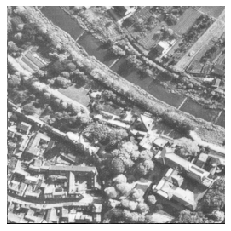

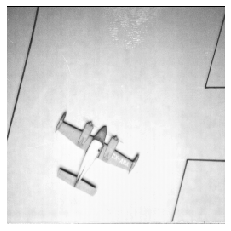

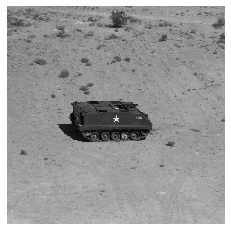

In [6]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/Aerial.tiff'
img1_a = image(path1_a,display = True)
'''
print("The numpy format of the image is ..")
print(img1_a.I)
'''

path1_b = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/Airplane.tiff'
img1_b = image(path1_b,display = True)

path1_c = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/apc.tiff'
img1_c = image(path1_c,display = True)

### 2.2 Print max and min pixel values of I 

In [7]:

print("-----------------  For aerial.jpg  -----------------\n")
print("The max value = %d ; min value of I = %d "% (np.amax(img1_a.I), np.amin(img1_a.I) ) )
print ("The resolution of I is (%d x %d)" %( img1_a.I.shape[0], img1_a.I.shape[1]))

print("-----------------  For airplane.jpg  -----------------\n")
print("The max value = %d ; min value of I = %d "% (np.amax(img1_b.I), np.amin(img1_b.I) ) )
print ("The resolution of I is (%d x %d)" %( img1_b.I.shape[0], img1_b.I.shape[1]))


print("-----------------  For apc.jpg  -----------------\n")
print("The max value = %d ; min value of I = %d "% (np.amax(img1_c.I), np.amin(img1_c.I) ) )
print ("The resolution of I is (%d x %d)" %( img1_c.I.shape[0], img1_c.I.shape[1]))



-----------------  For aerial.jpg  -----------------

The max value = 248 ; min value of I = 1 
The resolution of I is (256 x 256)
-----------------  For airplane.jpg  -----------------

The max value = 232 ; min value of I = 0 
The resolution of I is (256 x 256)
-----------------  For apc.jpg  -----------------

The max value = 215 ; min value of I = 12 
The resolution of I is (512 x 512)


Since the max and min value range between [0, 255] and pixel values are integers . We can represent each pixel with a 8bit level . 



### 2.3 Size and efficiency 

In [8]:


print("\n-----------------  For aerial.jpg  -----------------\n")
img1_a.find_size()
print("Considering 256 gray levels , thus representing each pixel with 8 bits = 1 byte")
print("In theory the image should have taken %d bytes = %d bits"%(img1_a.I.size, img1_a.I.size*8))
img1_a.efficiency()

print("\n-----------------  For airplane.jpg  -----------------\n")
img1_b.find_size()
print("Considering 256 gray levels , thus representing each pixel with 8 bits = 1 byte")
print("In theory the image should have taken %d bytes = %d bits"%(img1_b.I.size, img1_b.I.size*8))
img1_b.efficiency()

print("\n-----------------  For apc.jpg  -----------------\n")

img1_c.find_size()
print("Considering 256 gray levels , thus representing each pixel with 8 bits = 1 byte")
print("In theory the image should have taken %d bytes = %d bits"%(img1_c.I.size, img1_c.I.size*8))
img1_c.efficiency()


-----------------  For aerial.jpg  -----------------

The memory size taken by  the image is  65670 bytes = 525360 bits
Considering 256 gray levels , thus representing each pixel with 8 bits = 1 byte
In theory the image should have taken 65536 bytes = 524288 bits
Efficiency is 99.796 percent

-----------------  For airplane.jpg  -----------------

The memory size taken by  the image is  65670 bytes = 525360 bits
Considering 256 gray levels , thus representing each pixel with 8 bits = 1 byte
In theory the image should have taken 65536 bytes = 524288 bits
Efficiency is 99.796 percent

-----------------  For apc.jpg  -----------------

The memory size taken by  the image is  262278 bytes = 2098224 bits
Considering 256 gray levels , thus representing each pixel with 8 bits = 1 byte
In theory the image should have taken 262144 bytes = 2097152 bits
Efficiency is 99.949 percent


Thus we can observe that efficiency is not greater that 100 % , on the contrary it is less that 100 percent. This is because the image while saved on the local computer also saves some meta data like image title etc. This takes up some space and thus drops down the efficiency . 

### 2.4 Bit planes


-----------------  For aerial.jpg  -----------------



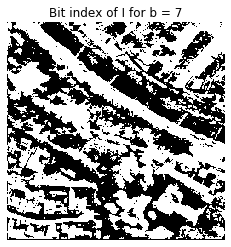


-----------------  For airplane.jpg  -----------------



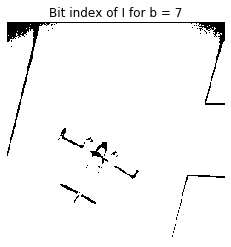


-----------------  For apc.jpg  -----------------



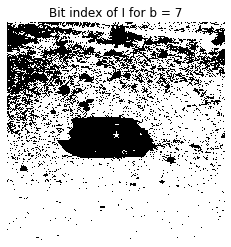

In [9]:
print("\n-----------------  For aerial.jpg  -----------------\n")
img1_a.bitplane(b = 7, B = 8)
print("\n-----------------  For airplane.jpg  -----------------\n")
img1_b.bitplane(b = 7, B = 8)
print("\n-----------------  For apc.jpg  -----------------\n")
img1_c.bitplane(b = 7, B = 8)

# Problem 3 : Binary Image Processing 


-----------------  For airplane.jpg  -----------------



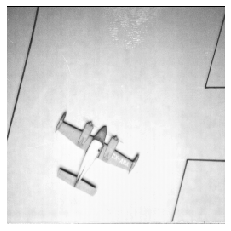


-----------------  For truck.jpg  -----------------



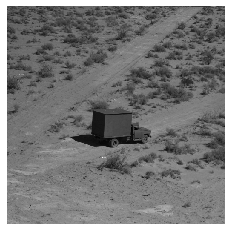


-----------------  For airport.jpg  -----------------



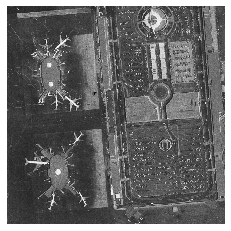


-----------------  For apc.jpg  -----------------



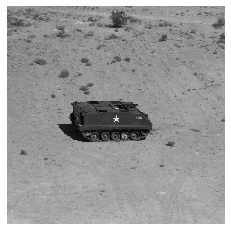

In [10]:

print("\n-----------------  For airplane.jpg  -----------------\n")
path2_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/airplane.tiff'
img2_a = image(path2_a,display = True)

print("\n-----------------  For truck.jpg  -----------------\n")

path2_b = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/truck.tiff'
img2_b = image(path2_b,display = True)
print("\n-----------------  For airport.jpg  -----------------\n")
path2_c = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/airport.tiff'
img2_c = image(path2_c,display = True)
print("\n-----------------  For apc.jpg  -----------------\n")
path2_d = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#1/apc.tiff'
img2_d = image(path2_d,display = True)




### 3.1  Compute and display histogram , comment on modality


-----------------  For airplane.jpg  -----------------



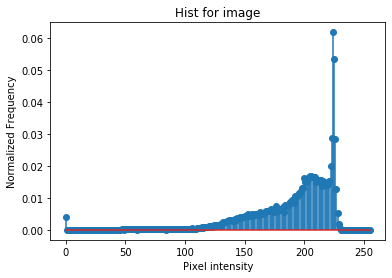

Modality of the image is unimodal 

-----------------  For truck.jpg  -----------------



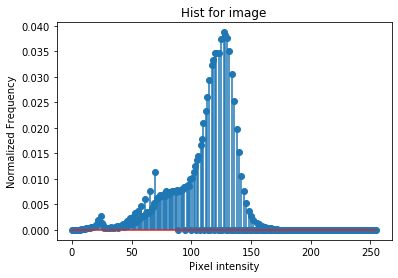

Modality of the image is unimodal 

-----------------  For airport.jpg  -----------------



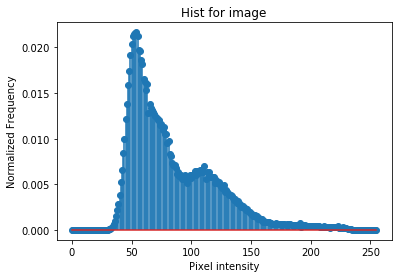

Modality of the image is unimodal 

-----------------  For apc.jpg  -----------------



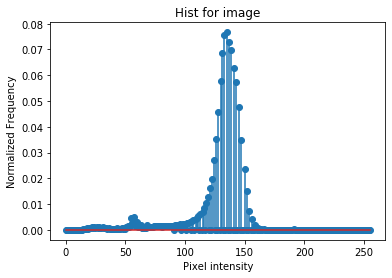

Modality of the image is unimodal 


In [11]:

print("\n-----------------  For airplane.jpg  -----------------\n")
img2_a.compute_hist(plot_hist = True)
print("Modality of the image is unimodal ")
print("\n-----------------  For truck.jpg  -----------------\n")
img2_b.compute_hist(plot_hist = True)
print("Modality of the image is unimodal ")
print("\n-----------------  For airport.jpg  -----------------\n")
img2_c.compute_hist(plot_hist = True)
print("Modality of the image is unimodal ")
print("\n-----------------  For apc.jpg  -----------------\n")
img2_d.compute_hist(plot_hist = True)
print("Modality of the image is unimodal ")

### 3.2 Binarize the image through thresholding 


-----------------  For airplane.jpg  -----------------



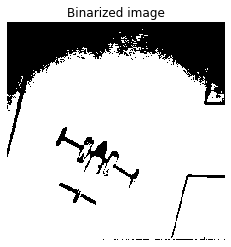


-----------------  For truck.jpg  -----------------



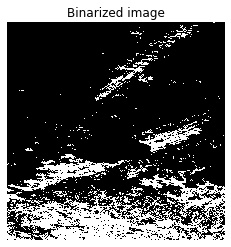


-----------------  For airport.jpg  -----------------



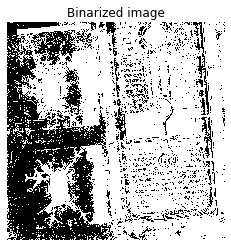


-----------------  For apc.jpg  -----------------



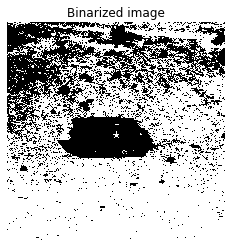

In [12]:
## Placing the threshold at mode!

print("\n-----------------  For airplane.jpg  -----------------\n")
img2_a.binarize(thresh = 175, display = True, title = "Binarized image")
print("\n-----------------  For truck.jpg  -----------------\n")
img2_b.binarize(thresh = 130, display = True, title = "Binarized image")
print("\n-----------------  For airport.jpg  -----------------\n")
img2_c.binarize(thresh = 60, display = True, title = "Binarized image")
print("\n-----------------  For apc.jpg  -----------------\n")
img2_d.binarize(thresh = 130, display = True, title = "Binarized image")

### 3.3.a OTSU thresholding using intra class variance 


-----------------  For airplane.jpg  -----------------

The calculated optimal OTSU threshold is 178


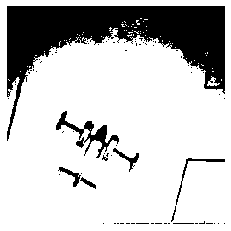


-----------------  For truck.jpg  -----------------

The calculated optimal OTSU threshold is 96


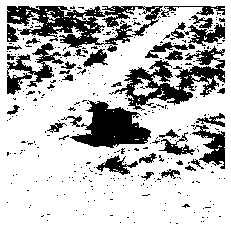


-----------------  For airport.jpg  -----------------

The calculated optimal OTSU threshold is 95


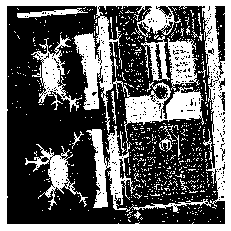


-----------------  For apc.jpg  -----------------

The calculated optimal OTSU threshold is 99


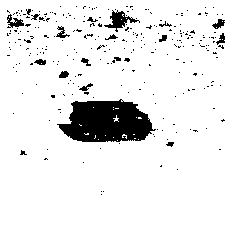

In [13]:

print("\n-----------------  For airplane.jpg  -----------------\n")
img2_a.OTSU_naive()
print("\n-----------------  For truck.jpg  -----------------\n")
img2_b.OTSU_naive()
print("\n-----------------  For airport.jpg  -----------------\n")
img2_c.OTSU_naive()
print("\n-----------------  For apc.jpg  -----------------\n")
img2_d.OTSU_naive()

### 3.3.b An efficient OTSU thresholding  


-----------------  For airplane.jpg  -----------------

The calculated optimal OTSU threshold is 178


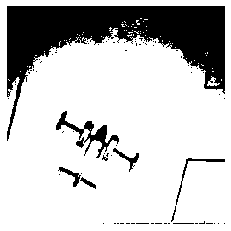


-----------------  For truck.jpg  -----------------

The calculated optimal OTSU threshold is 96


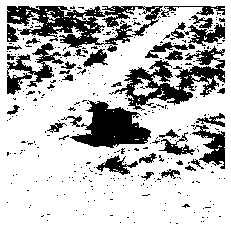


-----------------  For airport.jpg  -----------------

The calculated optimal OTSU threshold is 95


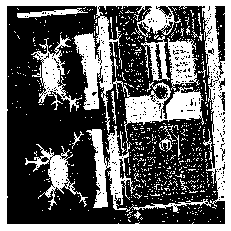


-----------------  For apc.jpg  -----------------

The calculated optimal OTSU threshold is 99


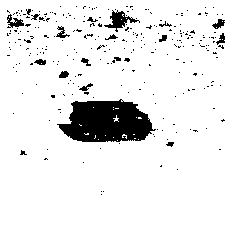

In [14]:

print("\n-----------------  For airplane.jpg  -----------------\n")
img2_a.OTSU_efficient()
print("\n-----------------  For truck.jpg  -----------------\n")
img2_b.OTSU_efficient()
print("\n-----------------  For airport.jpg  -----------------\n")
img2_c.OTSU_efficient()
print("\n-----------------  For apc.jpg  -----------------\n")
img2_d.OTSU_efficient()

### 3.4 Connected Components :
#### Demonstrating using the no. of blobs found and the R matrix 

In [15]:


print("\n-----------------  For airplane.jpg  -----------------\n")
img2_a.connected_components()
print("No. of blobs in white found : %d"%img2_a.count_blobs)
#print("\nIndices of found blobs are \n")
#print(img2_a.blobs_idx)
#print("\nThe R matrix is as follows :\n")
#print(img2_a.R)

print("\n-----------------  For truck.jpg  -----------------\n")

img2_b.connected_components()
print("No. of blobs in white found : %d"%img2_b.count_blobs)
#print("\nIndices of found blobs are \n")
#print(img2_b.blobs_idx)
#print("\nThe R matrix is as follows :\n")
#print(img2_b.R)

print("\n-----------------  For airport.jpg  -----------------\n")

img2_c.connected_components()
print("No. of blobs in white found : %d"%img2_c.count_blobs)
#print("\nIndices of found blobs are \n")
#print(img2_c.blobs_idx)
#print("\nThe R matrix is as follows :\n")
#print(img2_c.R)
print("\n-----------------  For apc.jpg  -----------------\n")

img2_d.connected_components()
print("No. of blobs in white found : %d"%img2_d.count_blobs)
#print("\nIndices of found blobs are \n")
#print(img2_d.blobs_idx)
#print("\nThe R matrix is as follows :\n")
#print(img2_d.R)


-----------------  For airplane.jpg  -----------------

No. of blobs in white found : 144

-----------------  For truck.jpg  -----------------

No. of blobs in white found : 699

-----------------  For airport.jpg  -----------------

No. of blobs in white found : 8248

-----------------  For apc.jpg  -----------------

No. of blobs in white found : 182


### 3.5 Minor Blob removal 


-----------------  For airplane.jpg  -----------------



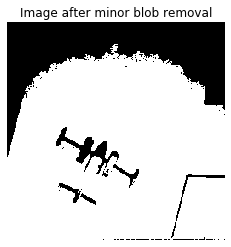


-----------------  For truck.jpg  -----------------



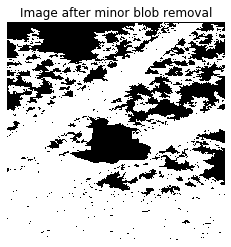


-----------------  For apc.jpg  -----------------



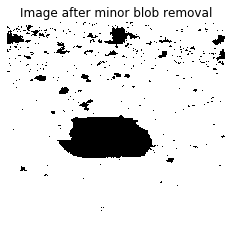

In [16]:
print("\n-----------------  For airplane.jpg  -----------------\n")
img2_a.remove_minor_blobs()
print("\n-----------------  For truck.jpg  -----------------\n")
img2_b.remove_minor_blobs()
print("\n-----------------  For apc.jpg  -----------------\n")
img2_d.remove_minor_blobs()

# The End